In [ ]:
from sklearn.datasets import make_classification

In [12]:
import matplotlib.pyplot as plt

In [31]:
def print_result(y, y_resampled):
    print('Before')
    print("클래스 0 샘플 수: ", sum(y == 0))
    print("클래스 1 샘플 수: ", sum(y == 1))

    print('After')
    print("클래스 0 샘플 수: ", sum(y_resampled == 0))
    print("클래스 1 샘플 수: ", sum(y_resampled == 1))

In [32]:
def visualize_sampling(X, y, X_resampled, y_resampled, method_name):
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    # Class 0
    plt.scatter(X[y==0][:, 0], X[y==0][:, 1], label='Class 0', alpha=0.5)
    # Class 1
    plt.scatter(X[y==1][:, 0], X[y==1][:, 1], label='Class 1', alpha=0.5)
    plt.title('Original Data Dsitribution')
    plt.legend()

    plt.subplot(1, 2, 2)
    # Class 0
    plt.scatter(X_resampled[y_resampled==0][:, 0], X_resampled[y_resampled==0][:, 1], label='Class 0', alpha=0.5)
    # Class 1
    plt.scatter(X_resampled[y_resampled==1][:, 0], X_resampled[y_resampled==1][:, 1], label='Class 1', alpha=0.5)
    plt.title(f'Data Dsitribution after {method_name}')
    plt.legend()

    plt.tight_layout()
    plt.show()    

# 가상의 데이터 생성

In [5]:
# class_sep : 값이 클수록 클래스 간 데이터 포인트들이 서로 멀어짐. 
# flip_y : 데이터에 노이즈 추가 정도
# n_samples : 1000개의 데이터 포인트(X의 행)
# n_features=20(defualt) : 각 데이터 포인트에 대해 20개의 특징이 생성(X의 열)
X, y = make_classification(
    n_classes=2, class_sep=2, weights=[0.1, 0.9], flip_y=0,
    n_clusters_per_class=1, n_samples=1000, random_state=10
)

# OverSampling

In [33]:
from imblearn.over_sampling import SMOTE

## SMOTE 오버샘플링 적용

In [8]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [11]:
print_result(y, y_resampled)

Before
클래스 0 샘플 수:  100
클래스 1 샘플 수:  900
After
클래스 0 샘플 수:  900
클래스 1 샘플 수:  900


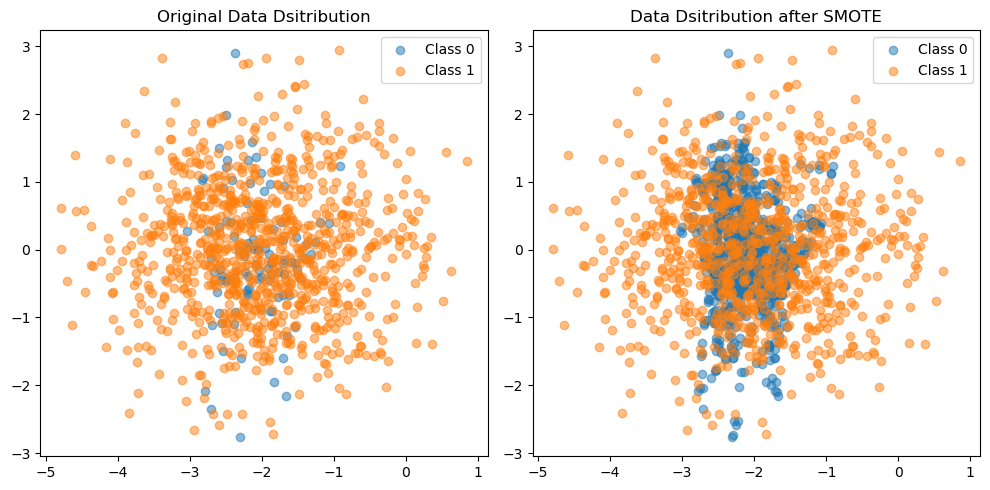

In [25]:
visualize_sampling(X, y, X_resampled, y_resampled, 'SMOTE')

# UnderSampling

In [34]:
from imblearn.under_sampling import RandomUnderSampler

## RandomUnderSampling 적용

In [35]:
rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X, y)

In [36]:
print_result(y, y_resampled)

Before
클래스 0 샘플 수:  100
클래스 1 샘플 수:  900
After
클래스 0 샘플 수:  100
클래스 1 샘플 수:  100


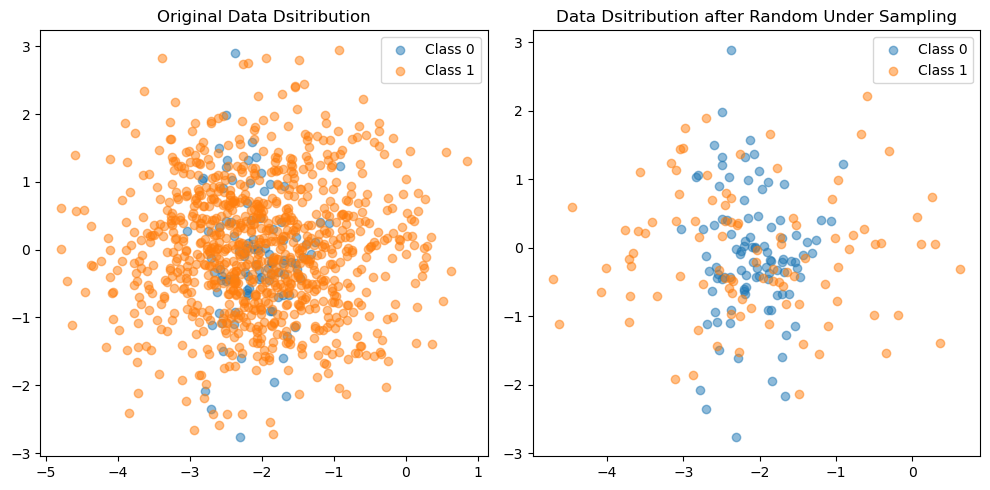

In [37]:
visualize_sampling(X, y, X_resampled, y_resampled, 'Random Under Sampling')